Some dirty notes from loosely reading through [The Little Book of Linear
Algebra](https://little-book-of.github.io/linear-algebra/) and llm-ing. This is more of
a log for my thought process and my most important insights.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#### Norm and Distance

L2 norm (euclidean): $\sqrt{v_1^2 + v_2^2 + \dots + v_n^2}$

In [5]:
v = np.array([3, 4])
length = np.linalg.norm(v) # euclidean norm (using pytagorean theorem)
print("Length of v =", length)

Length of v = 5.0


L1 norm (manhatten): $|v_1| + |v_2| + \dots + |v_n|$ </br>
is just a simple sum of all the components.


Interesting videos explaining norms: [Visualizing norms as a unit
circle](https://www.youtube.com/watch?v=SXEYIGqXSxk) and [What is Norm in Machine
Learning?](https://www.youtube.com/watch?v=FiSy6zWDfiA).

In Machine Learning, the Ridge Regression constraint makes sure that the l2 norm of the
weights vector should be larger or equal than a certain positive value. (In Lasso
Regression the l1 norm is used.)


The *distance* between `v` and another vector `u` is the length of their difference: `‖v - u‖`.
- the length between the tips of the vectors, if we imagine them as arrows originating
  from the origin

In [6]:
u = np.array([1, 1])
dist = np.linalg.norm(v - u)
print("Distance between v and u =", dist)

Distance between v and u = 3.605551275463989


"Mean squared error" measures the l2 distance between y_pred and y_true!!!

#### Dot Product

algebraic definition:
$x \cdot y = x_1 y_1 + x_2 y_2 + \dots + x_n y_n$ (if the vectors have the same dimension)

geometric definition:
$x \cdot y = \|x\| \, \|y\| \cos(\theta)$

- If the angle is acute (less than $\frac{\pi}{2}$), then $\cos(\theta) > 0$, so the dot product is positive.

- If the angle is right (exactly $\frac{\pi}{2}$), then $\cos(\theta) = 0$, so the dot product is 0.

- If the angle is obtuse (greater than $\frac{\pi}{2}$), then $\cos(\theta) < 0$, so the dot product is negative.

3blue1brown explain how these [two definitions are
related](https://www.youtube.com/watch?v=LyGKycYT2v0), using projections and
transformations. I get the main idea, but the details didn't really click with me.

KhanAcademy [video](https://www.youtube.com/watch?v=5AWob_z74Ks) explains the geometric
definition pretty well.

Note: the dot product is a combined measure of both size and alignment.

In [14]:
# exercise: Compute (2, –1) · (–3, 4). Then find the angle between them.
# my solution: 
# (2, –1) · (–3, 4) = -6 + (-4) = -10
# norm(x) = squrt(4 + 1) = ?? (need computer for that)
# norm(y) = squrt(9 + 16) = 5
# cos(angle) = -10/(norm(x) * norm(y))

x = np.array([2,-1])
y = np.array([-3,4])

norm_x = np.linalg.norm(x)
norm_y = np.linalg.norm(y)
print("norm(x)=",norm_x, " norm(y)=", norm_y)

x_dot_y = x @ y
print("x_dot_y=", x_dot_y)

cos_angle = x_dot_y / (norm_x * norm_y)
print("cos_angle=", cos_angle)

angle_rad = np.arccos(cos_angle) # returns radiants
angle_deg = np.degrees(angle_rad)

print("angle (radians) =", angle_rad)
print("angle (degrees) =", angle_deg)


norm(x)= 2.23606797749979  norm(y)= 5.0
x_dot_y= -10
cos_angle= -0.8944271909999159
angle (radians) = 2.677945044588987
angle (degrees) = 153.434948822922


In [15]:
# exercise: Check if (1, 2, 3) and (2, 4, 6) are orthogonal. What does the dot product tell you?
# my solution:
# dot_product = 2+8+18 = positive number, not orthogonal
# my gut feeling is that we would need at least one negative entry in any of the vectors 
# for them to be orthogonal (llm hinted they can also be 0s,of cause...)

In [16]:
# exercise: Find the projection of (3, 1) onto (1, 2). Draw the original vector, the 
# projection, and the perpendicular component.
# my solution:
# I don't have the slightest idea how to find a projection (I mean I could draw that on 
# paper, but calculate????)
# After researching a bit I give up on that. I cannot make out the difference between 
# scalar and vector projection and component and whether I need to divide by `u*u` or by 
# norm(u).
# though now I found this (let's just assume this is the right way to calculate it, 
# since I have given up understanding the "why" anyway...)
u = np.array([3,1])
v = np.array([1,2])
proj_length = np.dot(v, u) / np.linalg.norm(u)
print("Projection length of v onto u:", proj_length)

Projection length of v onto u: 1.5811388300841895


In [22]:
# exercise: Compute the dot product of (3,4) with (4,3). Is the result larger or smaller
# than the product of their lengths?
# my solution:
u = np.array([3,4])
v = np.array([4,3])
print(u @ v)
print(np.linalg.norm(u) * np.linalg.norm(v))
# The dot product is a bit smaller than the product of the lengths. Do I assume right 
# that they were the same if both vectors pointed into the exact same direction?
# And does the proximity of both numbers mean that both vectors point in only slightly
# different directions and the angle between them is very small?

# computing the angle to verify:
cos_angle = u @ v / (np.linalg.norm(u) * np.linalg.norm(v))
angle_rad = np.arccos(cos_angle) # returns radiants
angle_deg = np.degrees(angle_rad)
print("angle (degrees) =", angle_deg)

24
25.0
angle (degrees) = 16.260204708311967


In [20]:
# Also I just wonder what the dot product is when v is a multiple of u (or u=v), since
# they will return different dot products, but contain the same information... I will
# try that out here:
u = np.array([3,4])
v = np.array([3,4])
print(u @ v)

u = np.array([30,40])
v = np.array([30,40])
print(u @ v)

u = np.array([3,4])
v = np.array([30,40])
print(u @ v)



25
2500
250


In [21]:
# and with different numbers:
u = np.array([1,1])
v = np.array([2,2])
print(u @ v)

u = np.array([1,1])
v = np.array([1,1])
print(u @ v)

# conclusion: wow, the actual value of the dot product doesn't contain a lot of
# information when only looking at it alone! As a stand-alone only knowing if it is
# positive, negative or 0 is useful. Otherwise, we might need more information and would
# probably somehow apply the dot product to one of the vectors is came from...

4
2


(LLM broke it down for me:)

The key idea is that the dot product is both an algebraic operation and a geometric measurement:

1. Algebraically, for vectors $u = (u_1, u_2)$ and $v = (v_1, v_2)$, the dot product is
$u \cdot v = u_1 v_1 + u_2 v_2$. This is just summing products of corresponding components.

2. Geometrically, we want a measure that tells us how much the vectors point in the same direction.

- If they point exactly the same way, we want a “maximum value.”

- If they are perpendicular, we want zero.

- If opposite directions, we want a negative value.

3. Cosine comes naturally because it has exactly those properties:

- $\cos 0^\circ = 1$ → vectors same direction → max dot product.

- $\cos 90^\circ = 0$ → vectors perpendicular → zero dot product.

- $\cos 180^\circ = -1$ → vectors opposite → negative dot product.

4. Connecting algebra to geometry:

If you scale vectors to length 1 (unit vectors), then the dot product exactly measures $\cos\theta$ between them.

For arbitrary lengths, the dot product scales with the lengths: $u \cdot v = \|u\| \|v\| \cos\theta$.

So, cosine isn’t arbitrary. It's the function that encodes directional alignment between vectors. The formula is really just algebra $(u_1v_1 + u_2v_2)$ being interpreted geometrically via lengths and angles.

The llm's explanation makes sense to me and I now understand that cosine was chosen into
this formula in an engineering way (not discovered) because we want that information on
the angle between the two vectors. The lengthes of u and v are only a scaling factor.

In this plot we can see that `cos(theta) = (length of projection of u onto v) / (length of u)` </br>
(since the formula for cosine is $\cos(\alpha) = \frac{\text{adjacent}}{\text{hypotenuse}}$).

The cosine measures "how much" of vector $u$ falls along the direction of $v$.

Here, we show the unit circle and the scaling vectors $u$ and $v$.

![Vectors u and v with unit circle](media/dot_product_geometrical.png)

In [37]:
# Exercise: Compute the angle between (2, 1) and (1, –1). Interpret the result.

# My solution:
# theta = arccos((u@v)/(length of u times length of v))

u = np.array([2, 1])
v = np.array([1, -1])
theta = np.arccos((u@v)/(np.linalg.norm(u)*np.linalg.norm(v))) # radiants
print(theta)

theta_deg = np.degrees(theta) # degrees
print(theta_deg)

1.2490457723982544
71.56505117707799


In [48]:
# exercise: Find two vectors in 3D that form a 60° angle. Verify using the cosine formula.

# my solution:
# let's try around a bit and see if what I expect will actually happen:

def get_angle(u, v):
    theta = np.arccos((u@v)/(np.linalg.norm(u)*np.linalg.norm(v)))
    theta_deg = np.degrees(theta) 
    return theta_deg

# retuns 90 degrees?
u = np.array([1, 0, 0])
v = np.array([0, 1, 0])
print(get_angle(u, v)) # check

# retuns 60 degrees?
u = np.array([1, 0, 0])
v = np.array([2, 4, 0])
print(get_angle(u, v)) # nice try, lol... how can I even guess this for 2D without calculating it?

# let's calculate it for the 2D case:
#def get_second_vector(u, theta):
    # my attempt to re-arrange the formula
    #np.cos(theta) = u@v / (np.linalg.norm(u)*np.linalg.norm(v))
    #u@v = np.linalg.norm(u)*np.linalg.norm(v) * np.cos(theta)
    #u@v / np.linalg.norm(u) = np.linalg.norm(v) * np.cos(theta)
    #v@u@v / np.linalg.norm(u) = v @ (np.linalg.norm(v) * np.cos(theta)) # I can just apply @v from the left side, no?
    # No, obviously not... the right hand side doesn't even have another vector...

# arg, by accident llm told me an answer too early
theta_deg = 60
theta_rad = np.radians(theta_deg)
u = np.array([1, 0, 0])
v = np.array([np.cos(theta_rad),np.sin(theta_rad),0])
print(get_angle(u, v))

# let's finish that here and not try the 3D case

90.0
63.43494882292201
59.99999999999999


In [ ]:
# exercise: Consider word vectors for “cat” and “dog” in a machine learning model. Why
# might cosine similarity be a better measure of similarity than Euclidean distance?

# my attempt of a solution: 
# Euclidean distance measures the distance between the tips of the vectors and for
# encoded words we likely have a lot of dimensions, so everything is pretty far apart.
# Cosine similarity however measures if the words are similar independent of how
# frequent they are.

In [37]:
# exercise: In 3D, find a vector orthogonal to both (1, 2, 3) and (3, 2, 1).
# What angle does it make with each of them?

# my attempt of a solution is not existing, but I asked llm "I probably need to learn
# how to use a matrix for that since in 3D a whole plane would be orthogonal to a
# vector" and it answered with a solution already:
u = np.array([1, 2, 3])
v = np.array([3, 2, 1])
w = np.cross(u, v)
print(w)  # This is orthogonal to both u and v

print(get_angle(u, w))
print(get_angle(v, w))

# odd, just looked for usage of np.cross in scikit.learn: it is not existing!!!

# llm explains: The cross product is only defined for 3D vectors and is mainly used in
# geometry, graphics, and physics (e.g., finding perpendicular vectors, torque, area of
# parallelogram). Machine learning rarely needs to compute a vector orthogonal to two
# others, so np.cross is not relevant for scikit-learn’s algorithms.

[-4  8 -4]
90.0
90.0


#### Projections and Decompositions
- projections are a component obtained by splitting vectors into meaningful parts: one
  along a given direction and one perpendicular to it
- Scalar Projection: measures how much of $u$ lies in the direction of $v$ </br>
    $\text proj_ {scalar}(u\ onto\ v) = \frac{u \cdot v}{\|v\|}$

- Vector Projection: gives the actual arrow in the direction of that corresponds to this scalar amount </br>
    $\text proj_ {vector}(u\ onto\ v) = \left( \frac{u \cdot v}{||v||^2} \right) v$

Now I want to connect the geometric dot product definition with the algebraic one.

Formula for vector projection:
$\text{proj}_v(u) = \left( \frac{u \cdot v}{v \cdot v} \right) v$

- where the fraction $\frac{u \cdot v}{v \cdot v} \text{ gives us “how much” of } u
  \text{ points in the direction of } v$ (scalar) and multiplying by $ v \text{ gives us
  the actual vector along } v$.

Formula for scalar projection: $\text{length of projection} = \frac{u \cdot v}{\|v\|}$
(actually gives us the length of the projection!)

I want to solve this exercise that llm suggested to me: "Derive the projection formula
using only the algebraic definition." Though I am not sure how to do it.
(Somehow I now arrived at the topic of projections without having followed the book till
there, but let's still try it out in 2D:)

Vector projection (since we want to know how long the projection vector is)
$\text{proj}_v(u) = \left( \frac{u \cdot v}{v \cdot v} \right) v$
Using algebraic dot product definition in 2D we would have:

$\text{proj}_v(u) = \left( \frac{u_1 v_1 + u_2 v_2}{v_1^2 + v_2^2} \right) v$

For $u = (1,1)$ and $v = (2,0)$ that is $\text{proj}_v(u) = \left( \frac{1*2 + 1*0}{4 +
0} \right) *(2,0)$. And we can see that we are looking at a proportion between $1*2 +
1*0$ (what would happen if we linearly transform $v$ with the use of $u$) compared to
appling $v$ on itself. We get 0.5 and then multiply this scalar with $v$ (because we
need the projection vector to have a direction).

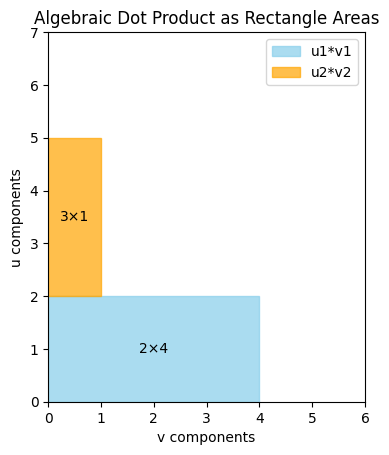

In [32]:
import matplotlib.pyplot as plt

u = [2, 3]
v = [4, 1]

fig, ax = plt.subplots()
# Rectangle for u1*v1
rect1 = plt.Rectangle((0, 0), v[0], u[0], color='skyblue', alpha=0.7, label='u1*v1')
ax.add_patch(rect1)
ax.text(v[0]/2, u[0]/2, f'{u[0]}×{v[0]}', ha='center', va='center')

# Rectangle for u2*v2
rect2 = plt.Rectangle((0, u[0]), v[1], u[1], color='orange', alpha=0.7, label='u2*v2')
ax.add_patch(rect2)
ax.text(v[1]/2, u[0]+u[1]/2, f'{u[1]}×{v[1]}', ha='center', va='center')

# Add vector u (green arrow from origin to (u[0], u[1]))
ax.arrow(0, 0, u[0], u[1], color='green', width=0.1, length_includes_head=True, label='u')
ax.text(u[0]+0.2, u[1]+0.2, 'u', color='green')

# Add vector v (red arrow from origin to (v[0], v[1]))
ax.arrow(0, 0, v[0], v[1], color='red', width=0.1, length_includes_head=True, label='v')
ax.text(v[0]+0.2, v[1]+0.2, 'v', color='red')

ax.set_xlim(0, max(v[0], u[0])+max(v[1], u[1])+2)
ax.set_ylim(0, max(u[1], v[1])+max(u[0], v[0])+2)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Algebraic Dot Product as Rectangle Areas with Vectors')
plt.legend()
plt.show()